In [207]:
import numpy as np 
import pandas as pd 




class AnalysisRaw():
    
    def __init__(self,time, data):
        """ Object initializing 
        add trace with childs """

        # set the time the experiment was runnning
        self.time = time
        self.data = data # set the data associated to the time
        self._trace = None

        # make additional slots for the metadata
        self._lower_bounds = None
        self._upper_bounds = None

        self._sweep = None # sweep in voltage or as current
        self._meta = None # integrate the metadata to the child 
        self.sliced_trace = None # both time as well as voltage data
        self.sliced_volt = None # only voltage data
        self._area = None
        self._max = None
        self._mean = None
        self._min = None

    @property
    def lower_bounds(self):
        """ get the lower and upper bounds """
        print("The lower bound: ")
        return self._lower_bounds
    
    @property
    def upper_bounds(self):
        print("The upper bound: ")
        return self._upper_bounds
        

    @lower_bounds.setter
    def lower_bounds(self, lower_bound):
        """ set the lower and upper bound """
        print("Setting value")
        if type(lower_bound) in [int,float]:
            self._lower_bounds = lower_bound
        else:
            raise TypeError("Wrong Input please specificy floats")
            
            
    @upper_bounds.setter
    def upper_bounds(self, upper_bound):
        """ set the lower and upper bound """
        print("Setting value")
        if type(upper_bound) in [int,float]:
            self._upper_bounds = upper_bound
        else:
            raise TypeError("Wrong Input please specificy floats")

    def construct_trace(self):
        """ construct the trace """  
        self.trace = np.vstack((self.time, self.data)).T
       
    def slice_trace(self):
        """ slice the trace based on the incoming upper and lower bounds """ 
        if (self._lower_bounds & self._upper_bounds):
            self.sliced_trace = self.trace[((self.trace[:,0] > self._lower_bounds) & (self.trace[:,0] < self._upper_bounds))]
            print(self.sliced_trace)
            self.sliced_volt = self.sliced_trace[:,1]
        else:
            raise ValueError("No upper and lower bonds set yet, please sets and use the rectangular function")

    def max_current(self):
        """ determine the max voltage """
        self._max = np.max(self.sliced_volt)
        return self._max
    
    def mean_current(self):
        self._mean = np.mean(self.sliced_volt)
        return self._mean
       
    def min_current(self):
        self._min = np.min(self.sliced_volt)
        return self._min
    
    def time_to_maximum(self):
        index = self.index_calculation(self._max)
        time = self.sliced_trace[:,0][:index]
        self._max_time = self.calculate_time(np.max(time),np.min(time))
        print(self._max_time)
        
    def time_to_minimum(self):
        index = self.index_calculation(self._min)
        time = self.sliced_trace[:,0][:index]
        self._min_time = self.calculate_time(np.max(time),np.min(time))
        print(self._min_time)
        
    def time_to_threshold(self, threshold):
        if type(threshold) in [int,float]:
            index = self.index_calculation(threshold, True)
            time = self.sliced_trace[:,0][:index]
            self._threshold_time = self.calculate_time(np.max(time),np.min(time))
            print(self._threshold_time)
        else:
            raise ValueError("Please use a float or integer as a valid voltage threshold")
        
    def index_calculation(self, value, comp = None):
        if comp:
            index = np.where(self.sliced_volt > value)[0][0]
            return index
        index = np.where(self.sliced_volt == value)[0][0]
        return index
        
    def calculate_time(self,maximum, minimum):
        time = maximum-minimum
        if time < 0: 
            raise ValueError("Negative time, think about switching indices")
        return time
        
    def get_cslow(self, meta_data_slow):
        """ add here check conditions for cslow ranges ect """ 
        return meta_data_cslow

    def check_rseries(self, rseries):
        if type(rseries) is int:
            if rseries < 12:
                qc = 1
                return rseries, qc
            else:
                raise "Rseries changed to much is flagged for quality check"
                qc = 0
                return rseries, qc 

    def get_area(self):
        self.area =  np.trapz(self.sliced_trace[:,0],self.sliced_trace[:,1])
        print(self.area)

    @classmethod   
    def __sub__(cls, first_trace, second_trace):
        try:
            sub_trace = self.slice_volt - second_trace
        except ValueError:
            raise("Please use input with the same shape")

    @classmethod
    def __add__(cls,first_trace, second_trace):
        try:
            sub_trace = self.slice_volt + second_trace
            return sub_trace
        
        except:
            raise ValueError("Please use input with the same shape")

    @classmethod
    def __multiply__(cls, first_trace, second_trace):
        try: 
            sub_trace = self.slice_volt * second_trace
            return sub_trace
        
        except ValueError:
            raise("Please use input with the same shape")
        

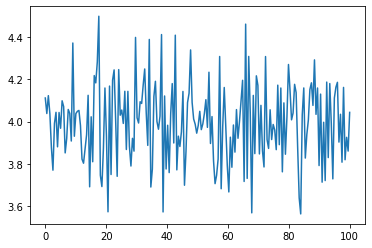

In [180]:
import seaborn as sns
time = np.linspace(0,100, 200)
data = np.random.normal(4, 0.2, 200)
sns.lineplot(time, data)

In [206]:
analysis = AnalysisRaw(time, data)
analysis.lower_bounds = 30
analysis.upper_bounds = 40
analysis.construct_trace()
analysis.slice_trace()
analysis.max_current()
analysis.mean_current()
analysis.min_current()
analysis.get_area()
analysis.time_to_maximum()
analysis.time_to_minimum()
analysis.time_to_threshold(4.14)

Setting value
Setting value
[[30.15075377  4.01785699]
 [30.65326633  3.99292797]
 [31.15577889  4.09361698]
 [31.65829146  4.08560658]
 [32.16080402  4.17224179]
 [32.66331658  4.24891528]
 [33.16582915  4.0411769 ]
 [33.66834171  3.88699705]
 [34.17085427  4.38887012]
 [34.67336683  3.68961942]
 [35.1758794   3.77462511]
 [35.67839196  4.1188922 ]
 [36.18090452  4.1905856 ]
 [36.68341709  4.00026615]
 [37.18592965  3.96351338]
 [37.68844221  4.02560238]
 [38.19095477  4.41200319]
 [38.69346734  3.57155646]
 [39.1959799   4.12101917]
 [39.69849246  3.7750718 ]]
-9.806657028593197
7.537688442211056
8.040201005025125
1.5075376884422127


In [165]:
np.where(data == 3.94253269)

(array([], dtype=int64),)